In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import sklearn

In [2]:
sklearn.__version__

'0.24.1'

In [3]:
from platform import python_version

print(python_version())

3.8.8


# Config

In [4]:
#directory = os.path.dirname(os.path.dirname(os.getcwd()))


In [5]:
#plot_dir = directory +'/aerosol_results/invertible_model_phase_noise_small_drop0/plots/hyperparameter_scans'
#plot_dir = directory+'/aerosol_results/simulated_data/invertible_model3/plots/hyperparameter_scans'
#if not os.path.exists(plot_dir):
#    os.makedirs(plot_dir)

In [6]:
#result_dir = directory +'/aerosol_results/simulated_data/invertible_model3'

In [7]:
#model_dir = directory +'/aerosol_results/simulated_data/models_overview/models3'
#if not os.path.exists(model_dir):
#    os.makedirs(model_dir)

In [9]:
directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
directory1 = directory + 'real_meas_scan_532'



In [10]:
plot_dir = directory1 + '/plots/hyperparameter_scans_new'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
result_dir = directory1
model_dir = directory1 +'/model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [11]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/real_meas_scan_532/model'

# Load data

In [12]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)


In [13]:
config_columns = [col for col in df.columns if col.startswith('config/')]
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [14]:
df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

In [15]:
df['r2_val']

0     0.950678
1     0.874859
2     0.929435
3     0.780851
4     0.912017
5     0.922361
6     0.936129
7     0.884287
8     0.968610
9     0.940459
10    0.949505
11    0.859136
12    0.929200
13    0.927336
14    0.941599
15    0.832184
16    0.952774
17    0.951275
18    0.971004
19    0.879052
20    0.932360
21    0.949584
22    0.941415
23    0.969673
24    0.962454
25    0.761058
26    0.929837
Name: r2_val, dtype: float64

In [16]:
df['r2_val_dvar']

0     0.728367
1     0.868893
2     0.877220
3     0.894856
4     0.727652
5     0.706914
6     0.701089
7     0.722060
8     0.692193
9     0.706353
10    0.707789
11    0.797865
12    0.876682
13    0.712771
14    0.703946
15    0.734299
16    0.742795
17    0.884857
18    0.695166
19    0.794337
20    0.727115
21    0.717507
22    0.717646
23    0.685364
24    0.663928
25    0.803801
26    0.725649
Name: r2_val_dvar, dtype: float64

# Plot

## Generalisation of $R^2$

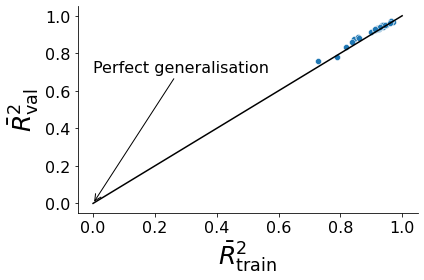

In [17]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_train', y='r2_val', ax=ax)
ax.plot([0, 1.], [0, 1.], color='black')
ax.annotate(xy=(0, 0),
            xytext=(0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_qoi_generalisation.jpg')

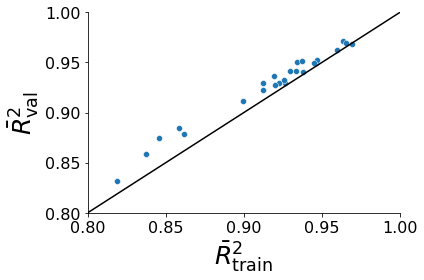

In [18]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_train', y='r2_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
#ax.annotate(xy=(0.8, 0.8),
#            xytext=(0.1, 0.8),
#            text='Perfect generalisation',
#            fontsize=16,
#            arrowprops={
#                'arrowstyle': '->'
#            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.8, 1.])
ax.set_ylim([0.8, 1.])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_qoi_generalisation_closeup.jpg')

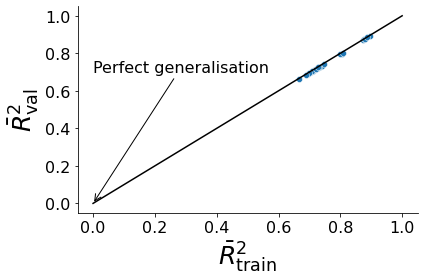

In [19]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_train_dvar', y='r2_val_dvar', ax=ax)
ax.plot([0, 1.], [0, 1.], color='black')
ax.annotate(xy=(0, 0),
            xytext=(0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_dvar_generalisation.jpg')

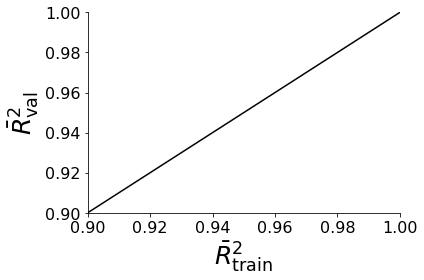

In [20]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_train_dvar', y='r2_val_dvar', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
#ax.annotate(xy=(0.8, 0.8),
#            xytext=(0.1, 0.8),
#            text='Perfect generalisation',
#            fontsize=16,
#            arrowprops={
#                'arrowstyle': '->'
#            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.9, 1.])
ax.set_ylim([0.9, 1.])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_dvar_generalisation_closeup.jpg')

## Relationship between $R^2$ and rel. error

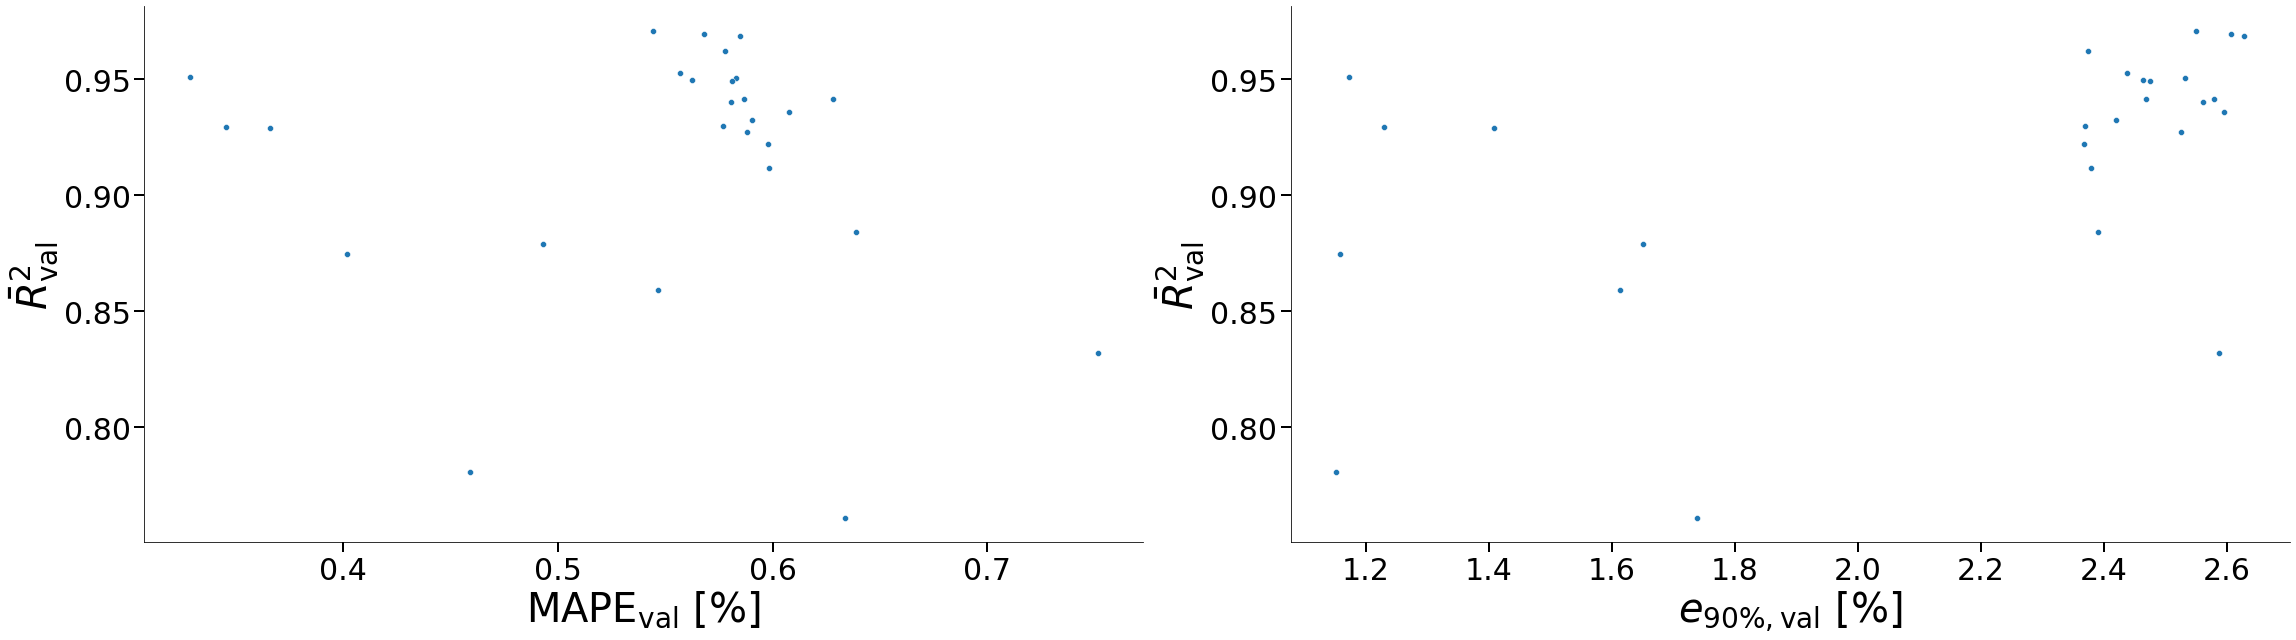

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
sns.scatterplot(data=df, x='MAPE_val', y='r2_adj_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
sns.scatterplot(data=df, x='90_percentile_max_error_val', y='r2_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Execution time vs. batch size

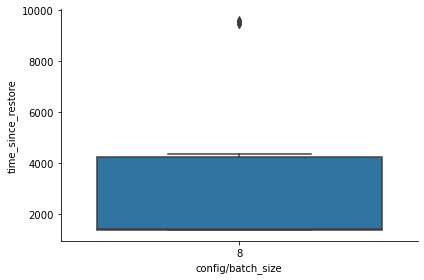

In [22]:
fig, ax = plt.subplots()

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/time_vs_batch_size')

## Dependence on the parameters

In [23]:
config_columns

['config/activation_function_last_layer',
 'config/activation_functions_inbetween',
 'config/batch_size',
 'config/datafile',
 'config/epochs',
 'config/learning_rate',
 'config/n_blocks',
 'config/n_depth',
 'config/n_width',
 'config/nominal_dimension',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/weight_artificial',
 'config/weight_reconstruction',
 'config/weight_x',
 'config/weight_y',
 'config/weight_z',
 'config/y_noise']

In [24]:
config_columns_changing = ['config/weight_reconstruction','config/weight_x','config/weight_z']
config_columns_changing = config_columns

In [25]:
to_plot = df[config_columns_changing + ['r2_val_dvar']].rename(columns=config_column_labels)

<ipython-input-26-4ae40c6ed3e8>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
<ipython-input-26-4ae40c6ed3e8>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


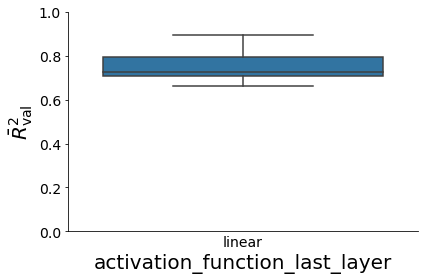

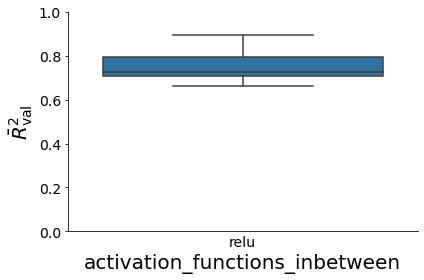

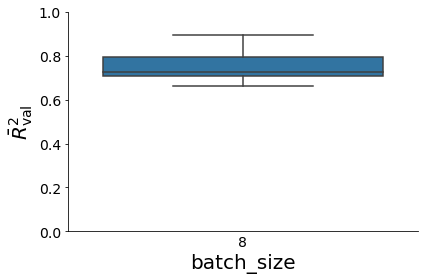

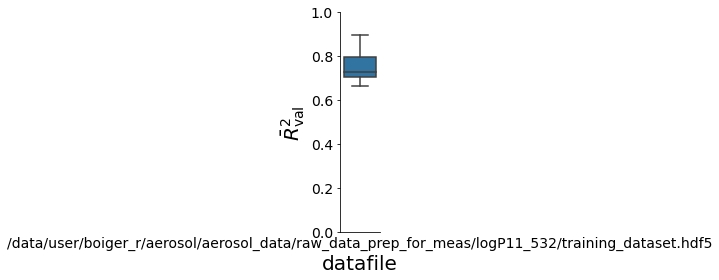

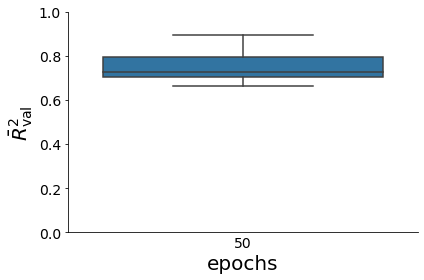

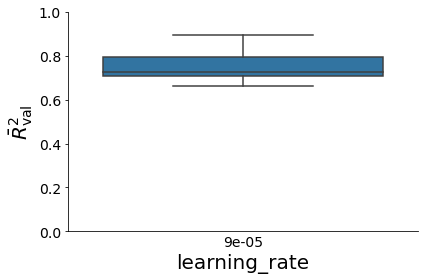

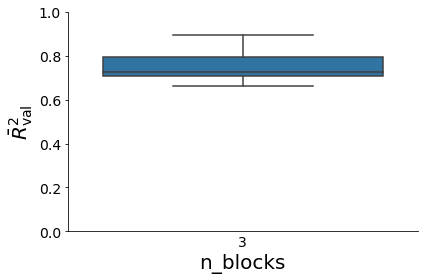

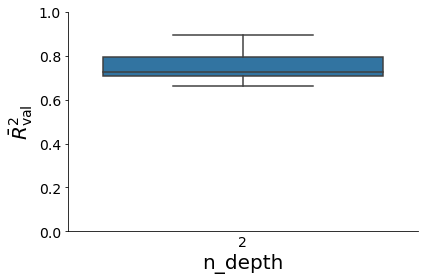

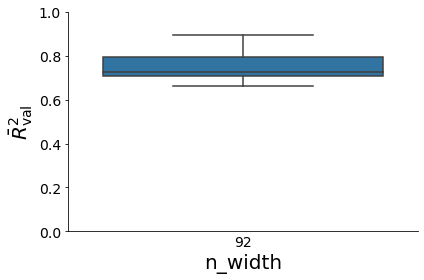

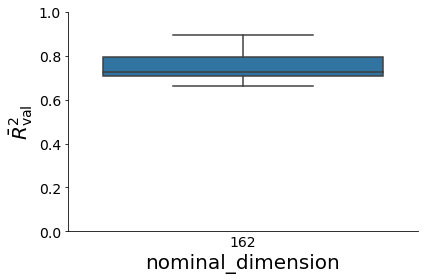

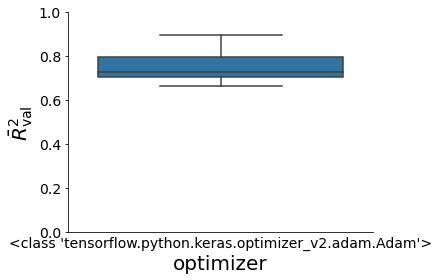

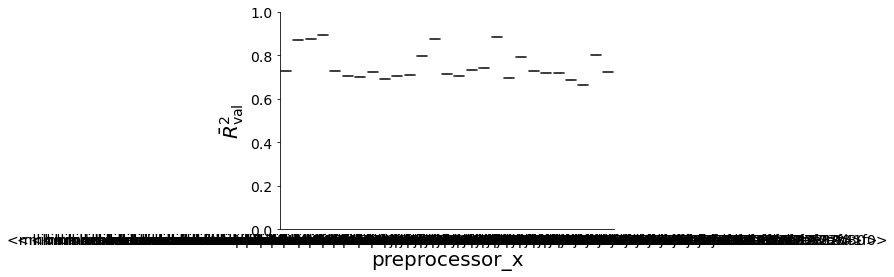

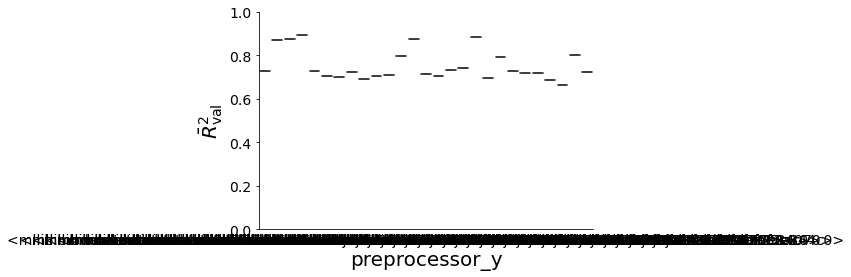

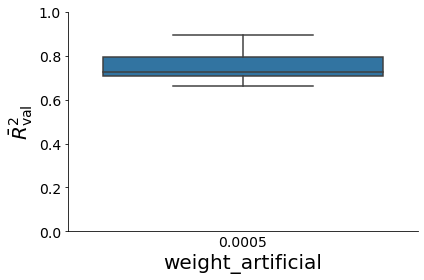

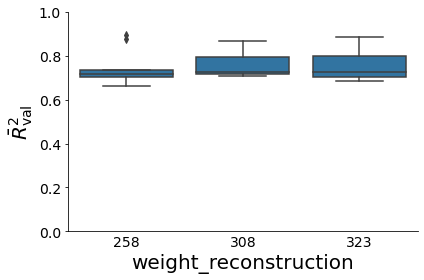

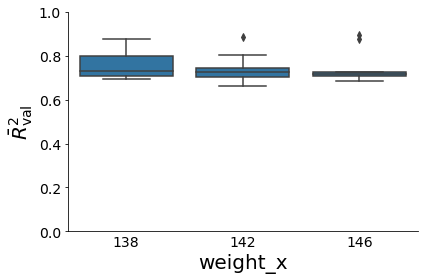

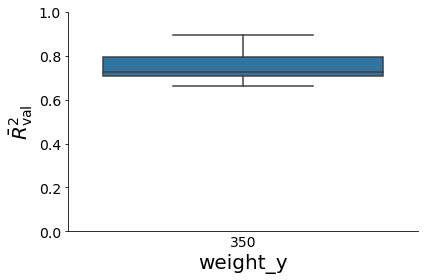

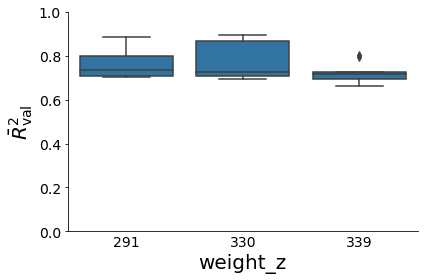

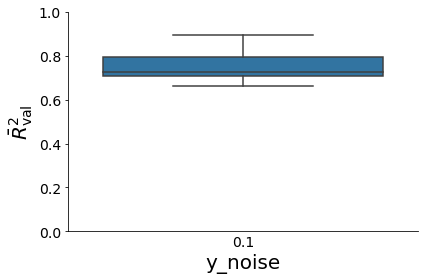

In [26]:
for param in to_plot.columns:
    if param == 'r2_val_dvar':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_val_dvar', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([0., 1.])
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

# Best configs

In [27]:
df['config/datafile'][0]

'/data/user/boiger_r/aerosol/aerosol_data/raw_data_prep_for_meas/logP11_532/training_dataset.hdf5'

In [28]:
df.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

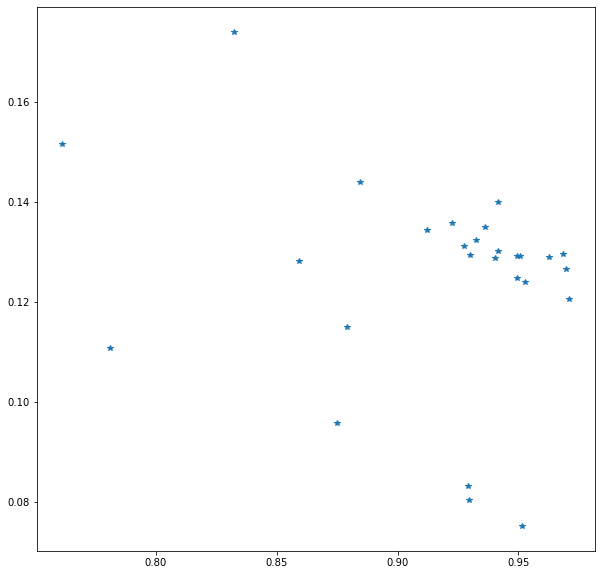

In [29]:
plt.figure(figsize = (10,10))
plt.plot(df['r2_val'],df['MAE_val'],'*')


In [85]:
best_config = df.sort_values('r2_val_dvar', ascending=False).iloc[1,:]
best_config

MAE_train                                                   0.079227
MAE_val                                                     0.075164
MAPE_train                                                  0.344108
MAPE_val                                                    0.328467
MSE_train                                                   0.172914
                                         ...                        
config/weight_x                                                  142
config/weight_y                                                  350
config/weight_z                                                  291
config/y_noise                                                   0.1
logdir             /data/project/general/aerosolretriev/aerosol_r...
Name: 17, Length: 64, dtype: object

In [86]:
df.sort_values('r2_val_dvar', ascending=False)

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
3    0.113450  0.110704    0.470504  0.459079   0.579423  0.610784   
17   0.079227  0.075164    0.344108  0.328467   0.172914  0.135563   
2    0.083058  0.080481    0.355627  0.345457   0.202119  0.196456   
12   0.084171  0.083182    0.370162  0.365891   0.213741  0.197309   
1    0.101325  0.095845    0.422157  0.401666   0.426448  0.349404   
25   0.158849  0.151587    0.663792  0.633710   0.747714  0.665339   
11   0.134135  0.128278    0.570044  0.546457   0.449170  0.393146   
19   0.119856  0.114945    0.512065  0.492889   0.381002  0.337010   
16   0.127842  0.124045    0.572005  0.556872   0.146121  0.131618   
15   0.179204  0.174037    0.772064  0.751390   0.500629  0.468361   
0    0.135888  0.129187    0.609869  0.582962   0.181592  0.137571   
4    0.140166  0.134311    0.622492  0.598258   0.276974  0.245391   
20   0.135074  0.132435    0.600898  0.590288   0.205705  0.189248   
26   0.136979  0.129497    0.607242  0.577063   0.241789  0.196061   
7    0.150972  0.144033    0.667189  0.638992   0.391434  0.322866   
22   0.135083  0.130167    0.606282  0.586499   0.194373  0.163072   
21   0.128779  0.124853    0.578185  0.562266   0.152544  0.140703   
13   0.136183  0.131281    0.606930  0.587967   0.219922  0.202375   
10   0.131483  0.129217    0.590668  0.581304   0.148006  0.140871   
5    0.138935  0.135711    0.610808  0.598077   0.243293  0.217156   
9    0.131103  0.128718    0.590233  0.580747   0.171778  0.166193   
14   0.144098  0.139974    0.644560  0.627950   0.184491  0.162862   
6    0.142946  0.135042    0.640449  0.607704   0.222712  0.178394   
18   0.125159  0.120531    0.562763  0.544553   0.100873  0.080809   
8    0.131047  0.129608    0.590438  0.584798   0.085061  0.087394   
23   0.131095  0.126515    0.587687  0.568170   0.095940  0.084465   
24   0.132416  0.129101    0.591176  0.577672   0.111870  0.104936   

    median_percentile_max_error_train  median_percentile_max_error_val  \
3                            0.508433                         0.510247   
17                           0.522202                         0.523953   
2                            0.503678                         0.505418   
12                           0.547237                         0.547372   
1                            0.506078                         0.504472   
25                           0.647206                         0.644439   
11                           0.704182                         0.702554   
19                           0.715412                         0.720915   
16                           1.232106                         1.228377   
15                           1.269399                         1.270858   
0                            1.225916                         1.218253   
4                            1.213247                         1.210736   
20                           1.191497                         1.191171   
26                           1.197478                         1.191032   
7                            1.224924                         1.222596   
22                           1.219567                         1.221461   
21                           1.181189                         1.184046   
13                           1.278965                         1.278010   
10                           1.266531                         1.259540   
5                            1.217430                         1.216408   
9                            1.257741                         1.253645   
14                           1.302798                         1.298346   
6                            1.288323                         1.288552   
18                           1.219788                         1.219178   
8                            1.318564                         1.317990   
23                           1.281023                         1.285121   
24                           1.313700        

In [87]:
df.iloc[3]['r2_train']

0.7900251302730112

In [88]:
df.sort_values('r2_val_dvar', ascending=False)


MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
3    0.113450  0.110704    0.470504  0.459079   0.579423  0.610784   
17   0.079227  0.075164    0.344108  0.328467   0.172914  0.135563   
2    0.083058  0.080481    0.355627  0.345457   0.202119  0.196456   
12   0.084171  0.083182    0.370162  0.365891   0.213741  0.197309   
1    0.101325  0.095845    0.422157  0.401666   0.426448  0.349404   
25   0.158849  0.151587    0.663792  0.633710   0.747714  0.665339   
11   0.134135  0.128278    0.570044  0.546457   0.449170  0.393146   
19   0.119856  0.114945    0.512065  0.492889   0.381002  0.337010   
16   0.127842  0.124045    0.572005  0.556872   0.146121  0.131618   
15   0.179204  0.174037    0.772064  0.751390   0.500629  0.468361   
0    0.135888  0.129187    0.609869  0.582962   0.181592  0.137571   
4    0.140166  0.134311    0.622492  0.598258   0.276974  0.245391   
20   0.135074  0.132435    0.600898  0.590288   0.205705  0.189248   
26   0.136979  0.129497    0.607242  0.577063   0.241789  0.196061   
7    0.150972  0.144033    0.667189  0.638992   0.391434  0.322866   
22   0.135083  0.130167    0.606282  0.586499   0.194373  0.163072   
21   0.128779  0.124853    0.578185  0.562266   0.152544  0.140703   
13   0.136183  0.131281    0.606930  0.587967   0.219922  0.202375   
10   0.131483  0.129217    0.590668  0.581304   0.148006  0.140871   
5    0.138935  0.135711    0.610808  0.598077   0.243293  0.217156   
9    0.131103  0.128718    0.590233  0.580747   0.171778  0.166193   
14   0.144098  0.139974    0.644560  0.627950   0.184491  0.162862   
6    0.142946  0.135042    0.640449  0.607704   0.222712  0.178394   
18   0.125159  0.120531    0.562763  0.544553   0.100873  0.080809   
8    0.131047  0.129608    0.590438  0.584798   0.085061  0.087394   
23   0.131095  0.126515    0.587687  0.568170   0.095940  0.084465   
24   0.132416  0.129101    0.591176  0.577672   0.111870  0.104936   

    median_percentile_max_error_train  median_percentile_max_error_val  \
3                            0.508433                         0.510247   
17                           0.522202                         0.523953   
2                            0.503678                         0.505418   
12                           0.547237                         0.547372   
1                            0.506078                         0.504472   
25                           0.647206                         0.644439   
11                           0.704182                         0.702554   
19                           0.715412                         0.720915   
16                           1.232106                         1.228377   
15                           1.269399                         1.270858   
0                            1.225916                         1.218253   
4                            1.213247                         1.210736   
20                           1.191497                         1.191171   
26                           1.197478                         1.191032   
7                            1.224924                         1.222596   
22                           1.219567                         1.221461   
21                           1.181189                         1.184046   
13                           1.278965                         1.278010   
10                           1.266531                         1.259540   
5                            1.217430                         1.216408   
9                            1.257741                         1.253645   
14                           1.302798                         1.298346   
6                            1.288323                         1.288552   
18                           1.219788                         1.219178   
8                            1.318564                         1.317990   
23                           1.281023                         1.285121   
24                           1.313700        

In [89]:
df.sort_values('r2_val', ascending=False)[config_columns_changing + ['r2_train_dvar','r2_val_dvar','r2_train','r2_val' ,'MAE_train','MAE_val']].rename(columns=config_column_labels).head(10)


activation_function_last_layer activation_functions_inbetween  batch_size  \
18                         linear                           relu           8   
23                         linear                           relu           8   
8                          linear                           relu           8   
24                         linear                           relu           8   
16                         linear                           relu           8   
17                         linear                           relu           8   
0                          linear                           relu           8   
21                         linear                           relu           8   
10                         linear                           relu           8   
14                         linear                           relu           8   

                                             datafile  epochs  learning_rate  \
18  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
23  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
8   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
24  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
16  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
17  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
0   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
21  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
10  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
14  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_x weight_y  \
18         3        2       92                162  ...      138      350   
23         3        2       92                162  ...      146      350   
8          3        2       92                162  ...      142      350   
24         3        2       92                162  ...      142      350   
16         3        2       92                162  ...      142      350   
17         3        2       92                162  ...      142      350   
0          3        2       92                162  ...      138      350   
21         3        2       92                162  ...      146      350   
10         3        2       92                162  ...      138      350   
14         3        2       92                162  ...      146      350   

   weight_z  y_noise  r2_train_dvar  r2_val_dvar  r2_train    r2_val  \
18      339      0.1       0.698960     0.695166  0.963421  0.971004   
23      339      0.1       0.687956     0.685364  0.965207  0.969673   
8       330      0.1       0.695337     0.692193  0.969121  0.968610   
24      339      0.1       0.666623     0.663928  0.959551  0.962454   
16      291      0.1       0.746981     0.742795  0.947019  0.952774   
17      291      0.1       0.886269     0.884857  0.937174  0.951275   
0       330      0.1       0.732685     0.728367  0.934219  0.950678   
21      339      0.1       0.721840     0.717507  0.944777  0.949584   
10      291      0.1       0.711235     0.707789  0.946390  0.949505   
14      291      0.1       0.708015     0.703946  0.933165  0.941599   

    MAE_train   MAE_val  
18   0.125159  0.120531  
23   0.131095  0.126515  
8    0.131047  0.129608  
24   0.132416  0.129101  
16   0.127842  0.124045  
17   0.079227  0.075164  
0    0.135888  0.129187  
21   0.128779  0.124853  
10   0.131483  0.129217  
14   0.144098  0.139974  

[10 rows x 25 columns]

In [90]:
df.sort_values('r2_val_dvar', ascending=False)[config_columns_changing + ['r2_train_dvar','r2_val_dvar','r2_train','r2_val' ,'MAE_train','MAE_val']].rename(columns=config_column_labels).head(20)

activation_function_last_layer activation_functions_inbetween  batch_size  \
3                          linear                           relu           8   
17                         linear                           relu           8   
2                          linear                           relu           8   
12                         linear                           relu           8   
1                          linear                           relu           8   
25                         linear                           relu           8   
11                         linear                           relu           8   
19                         linear                           relu           8   
16                         linear                           relu           8   
15                         linear                           relu           8   
0                          linear                           relu           8   
4                          linear                           relu           8   
20                         linear                           relu           8   
26                         linear                           relu           8   
7                          linear                           relu           8   
22                         linear                           relu           8   
21                         linear                           relu           8   
13                         linear                           relu           8   
10                         linear                           relu           8   
5                          linear                           relu           8   

                                             datafile  epochs  learning_rate  \
3   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
17  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
2   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
12  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
1   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
25  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
11  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
19  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
16  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
15  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
0   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
4   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
20  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
26  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
7   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
22  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
21  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
13  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
10  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
5   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_x weight_y  \
3          3        2       92                162  ...      146      350   
17         3        2       92                162  ...      142      350   
2          3        2       92                162  ...      138      350   
12         3        2       92                162  ...      146      350   
1          3        2       92                162  ...      138      350   
25         3        2       92                162  ...      142      350   
11         3        2       92                162  ...      138      350   
19         3        2       92   

In [91]:
best_config

MAE_train                                                   0.079227
MAE_val                                                     0.075164
MAPE_train                                                  0.344108
MAPE_val                                                    0.328467
MSE_train                                                   0.172914
                                         ...                        
config/weight_x                                                  142
config/weight_y                                                  350
config/weight_z                                                  291
config/y_noise                                                   0.1
logdir             /data/project/general/aerosolretriev/aerosol_r...
Name: 17, Length: 64, dtype: object

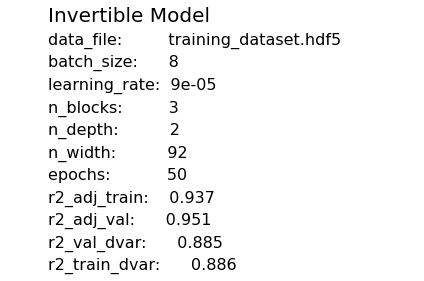

In [92]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 1),text='Invertible Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='data_file:         ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='batch_size:      ' +str(best_config['config/batch_size']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='learning_rate:  '+str(best_config['config/learning_rate']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='n_blocks:         '+str(best_config['config/n_blocks']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='n_depth:          '+str(best_config['config/n_depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='n_width:          '+str(best_config['config/n_width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:           '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:      '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.0),text='r2_val_dvar:      '+str(np.round(best_config['r2_val_dvar'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, -0.1),text='r2_train_dvar:      '+str(np.round(best_config['r2_train_dvar'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/invertible_model_description.jpg',bbox_inches='tight')

In [93]:
print('Invertible Model')
print('data_file:',os.path.basename(best_config['config/datafile']))
print('batch_size:',best_config['config/batch_size'])
print('learning_rate:',best_config['config/learning_rate'])
print('n_blocks:',best_config['config/n_blocks'])
print('n_depth:',best_config['config/n_depth'])
print('n_width:',best_config['config/n_width'])
print('epochs:',best_config['iterations_since_restore'])
print('r2_adj_train:',np.round(best_config['r2_adj_train'],3))
print('r2_adj_val:',np.round(best_config['r2_adj_val'],3))


Invertible Model
data_file: training_dataset.hdf5
batch_size: 8
learning_rate: 9e-05
n_blocks: 3
n_depth: 2
n_width: 92
epochs: 50
r2_adj_train: 0.937
r2_adj_val: 0.951


# Worst configs

In [94]:
df.sort_values('r2_val', ascending=True)[config_columns_changing + ['r2_val_dvar','r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

activation_function_last_layer activation_functions_inbetween  batch_size  \
25                         linear                           relu           8   
3                          linear                           relu           8   
15                         linear                           relu           8   
11                         linear                           relu           8   
1                          linear                           relu           8   

                                             datafile  epochs  learning_rate  \
25  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
3   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
15  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
11  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
1   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_reconstruction  \
25         3        2       92                162  ...                   308   
3          3        2       92                162  ...                   258   
15         3        2       92                162  ...                   258   
11         3        2       92                162  ...                   323   
1          3        2       92                162  ...                   308   

   weight_x weight_y  weight_z  y_noise  r2_val_dvar  r2_adj_val  MAPE_val  \
25      142      350       339      0.1     0.803801    0.760984  0.633710   
3       146      350       330      0.1     0.894856    0.780782  0.459079   
15      142      350       291      0.1     0.734299    0.832131  0.751390   
11      138      350       291      0.1     0.797865    0.859092  0.546457   
1       138      350       330      0.1     0.868893    0.874820  0.401666   

    median_percentile_max_error_val  90_percentile_max_error_val  
25                         0.644439                     1.738426  
3                          0.510247                     1.151744  
15                         1.270858                     2.587613  
11                         0.702554                     1.613744  
1                          0.504472                     1.158031  

[5 rows x 24 columns]

In [95]:
df

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0    0.135888  0.129187    0.609869  0.582962   0.181592  0.137571   
1    0.101325  0.095845    0.422157  0.401666   0.426448  0.349404   
2    0.083058  0.080481    0.355627  0.345457   0.202119  0.196456   
3    0.113450  0.110704    0.470504  0.459079   0.579423  0.610784   
4    0.140166  0.134311    0.622492  0.598258   0.276974  0.245391   
5    0.138935  0.135711    0.610808  0.598077   0.243293  0.217156   
6    0.142946  0.135042    0.640449  0.607704   0.222712  0.178394   
7    0.150972  0.144033    0.667189  0.638992   0.391434  0.322866   
8    0.131047  0.129608    0.590438  0.584798   0.085061  0.087394   
9    0.131103  0.128718    0.590233  0.580747   0.171778  0.166193   
10   0.131483  0.129217    0.590668  0.581304   0.148006  0.140871   
11   0.134135  0.128278    0.570044  0.546457   0.449170  0.393146   
12   0.084171  0.083182    0.370162  0.365891   0.213741  0.197309   
13   0.136183  0.131281    0.606930  0.587967   0.219922  0.202375   
14   0.144098  0.139974    0.644560  0.627950   0.184491  0.162862   
15   0.179204  0.174037    0.772064  0.751390   0.500629  0.468361   
16   0.127842  0.124045    0.572005  0.556872   0.146121  0.131618   
17   0.079227  0.075164    0.344108  0.328467   0.172914  0.135563   
18   0.125159  0.120531    0.562763  0.544553   0.100873  0.080809   
19   0.119856  0.114945    0.512065  0.492889   0.381002  0.337010   
20   0.135074  0.132435    0.600898  0.590288   0.205705  0.189248   
21   0.128779  0.124853    0.578185  0.562266   0.152544  0.140703   
22   0.135083  0.130167    0.606282  0.586499   0.194373  0.163072   
23   0.131095  0.126515    0.587687  0.568170   0.095940  0.084465   
24   0.132416  0.129101    0.591176  0.577672   0.111870  0.104936   
25   0.158849  0.151587    0.663792  0.633710   0.747714  0.665339   
26   0.136979  0.129497    0.607242  0.577063   0.241789  0.196061   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                            1.225916                         1.218253   
1                            0.506078                         0.504472   
2                            0.503678                         0.505418   
3                            0.508433                         0.510247   
4                            1.213247                         1.210736   
5                            1.217430                         1.216408   
6                            1.288323                         1.288552   
7                            1.224924                         1.222596   
8                            1.318564                         1.317990   
9                            1.257741                         1.253645   
10                           1.266531                         1.259540   
11                           0.704182                         0.702554   
12                           0.547237                         0.547372   
13                           1.278965                         1.278010   
14                           1.302798                         1.298346   
15                           1.269399                         1.270858   
16                           1.232106                         1.228377   
17                           0.522202                         0.523953   
18                           1.219788                         1.219178   
19                           0.715412                         0.720915   
20                           1.191497                         1.191171   
21                           1.181189                         1.184046   
22                           1.219567                         1.221461   
23                           1.281023                         1.285121   
24                           1.313700                         1.309602   
25                           0.647206                         0.644439   
26                           1.197478        

# Copy the best model to the models directory

In [96]:
best_config

MAE_train                                                   0.079227
MAE_val                                                     0.075164
MAPE_train                                                  0.344108
MAPE_val                                                    0.328467
MSE_train                                                   0.172914
                                         ...                        
config/weight_x                                                  142
config/weight_y                                                  350
config/weight_z                                                  291
config/y_noise                                                   0.1
logdir             /data/project/general/aerosolretriev/aerosol_r...
Name: 17, Length: 64, dtype: object

In [97]:
best_config["config/preprocessor_y"]

'<mllib.model.standardscaler.StandardScaler object at 0x2ba0f7e7e820>'

In [98]:
best_config["config/preprocessor_x"]

'<mllib.model.minmaxscaler.AdaptiveMinMaxScaler object at 0x2ba0f7e7e550>'

In [99]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'

In [100]:
#best_model_dir = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/preprocessed_by_hand/log_P11/mmscaled_asha_2/ASHA_invertible_id/train_invertible_model_c6982_00011_11_batch_size=8,weight_reconstruction=29,weight_x=37,weight_y=89,weight_z=65_2021-04-28_12-37-48/surrogate_model'


In [101]:
best_config["logdir"]

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/real_meas_scan_532/ASHA_invertible_id/train_invertible_model_17837_00017_17_nominal_dimension=162,weight_reconstruction=323,weight_x=142,weight_z=291_2022-02-14_16-09-23'

In [102]:
print(best_model_dir)

/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/real_meas_scan_532/ASHA_invertible_id/train_invertible_model_17837_00017_17_nominal_dimension=162,weight_reconstruction=323,weight_x=142,weight_z=291_2022-02-14_16-09-23/surrogate_model


In [103]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/real_meas_scan_532/model'

In [129]:
shutil.copytree(best_model_dir, f'{model_dir}/invertible_model')

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/real_meas_scan_532/model/invertible_model'

# Load history of best config

In [105]:
best_config.name

17

In [106]:
best_model_folder = best_config['trial_id']

In [107]:
best_model_folder

'17837_00017'

In [108]:
best_config

MAE_train                                                   0.079227
MAE_val                                                     0.075164
MAPE_train                                                  0.344108
MAPE_val                                                    0.328467
MSE_train                                                   0.172914
                                         ...                        
config/weight_x                                                  142
config/weight_y                                                  350
config/weight_z                                                  291
config/y_noise                                                   0.1
logdir             /data/project/general/aerosolretriev/aerosol_r...
Name: 17, Length: 64, dtype: object

In [109]:
result_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/real_meas_scan_532'

In [110]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [111]:
best_model_hist.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

# Save configurations of best model

In [112]:
best_config_df = pd.DataFrame(best_config)

In [113]:
best_config_df = best_config_df.T
best_config_df

MAE_train   MAE_val MAPE_train  MAPE_val MSE_train   MSE_val  \
17  0.079227  0.075164   0.344108  0.328467  0.172914  0.135563   

   median_percentile_max_error_train median_percentile_max_error_val  \
17                          0.522202                        0.523953   

   90_percentile_max_error_train 90_percentile_max_error_val  ...  \
17                      1.168293                    1.173077  ...   

                                     config/optimizer  \
17  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                config/preprocessor_x  \
17  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                config/preprocessor_y  \
17  <mllib.model.standardscaler.StandardScaler obj...   

   config/weight_artificial config/weight_reconstruction config/weight_x  \
17                   0.0005                          323             142   

   config/weight_y config/weight_z config/y_noise  \
17             350             291            0.1   

                                               logdir  
17  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 64 columns]

In [114]:
best_config_df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

In [115]:
best_config_df.to_csv(f'{model_dir}/configs.csv')

# Plot the history

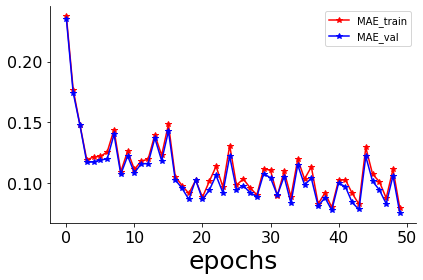

In [116]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()
fig.savefig(f'{plot_dir}/MAE_epoch.jpg',bbox_inches='tight')

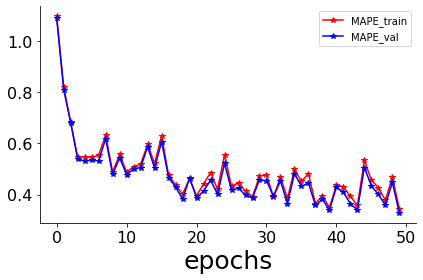

In [117]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

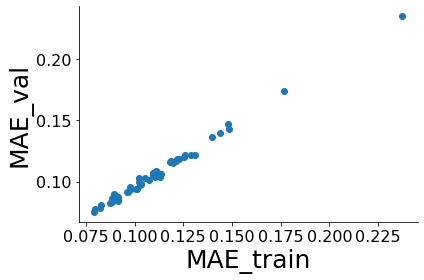

In [118]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train'],best_model_hist['MAE_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/MAE_val_train.jpg')

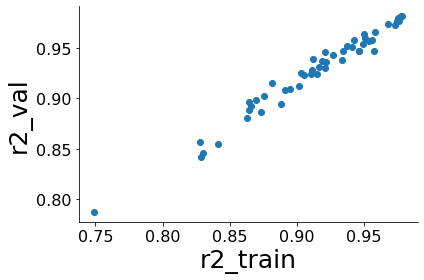

In [119]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train'],best_model_hist['r2_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('r2_train', fontsize=25)
ax.set_ylabel('r2_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_train_val.jpg')

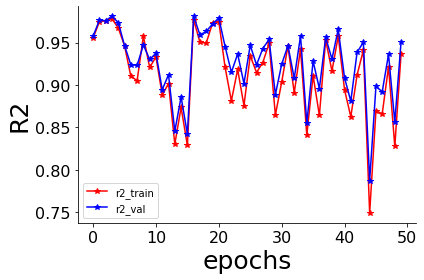

In [120]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['r2_train'],'r*-', label = 'r2_train')
ax.plot(best_model_hist['r2_val'],'b*-',label =  'r2_val')

#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.set_ylabel('R2', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()
fig.savefig(f'{plot_dir}/r2_epochs.jpg')

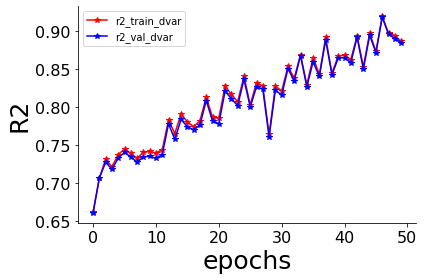

In [121]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['r2_train_dvar'],'r*-', label = 'r2_train_dvar')
ax.plot(best_model_hist['r2_val_dvar'],'b*-',label =  'r2_val_dvar')

#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.set_ylabel('R2', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()
fig.savefig(f'{plot_dir}/r2_dvar_epochs.jpg')

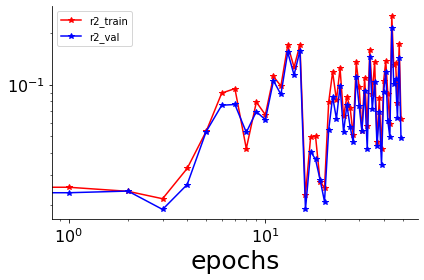

In [122]:
fig, ax = plt.subplots()

ax.plot(1-best_model_hist['r2_train'],'r*-', label = 'r2_train')
ax.plot(1-best_model_hist['r2_val'],'b*-',label =  'r2_val')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

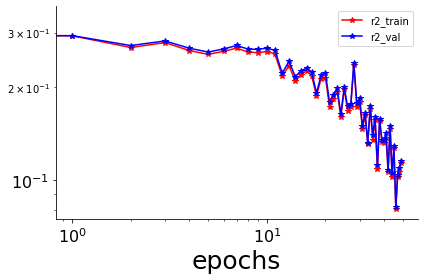

In [123]:
fig, ax = plt.subplots()

ax.plot(1-best_model_hist['r2_train_dvar'],'r*-', label = 'r2_train')
ax.plot(1-best_model_hist['r2_val_dvar'],'b*-',label =  'r2_val')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

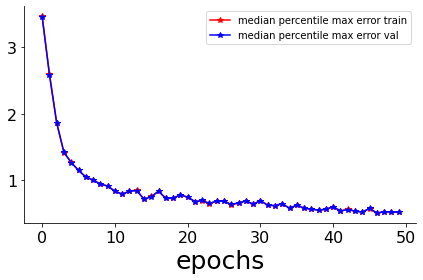

In [124]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['median_percentile_max_error_train'],'r*-', label = 'median percentile max error train')
ax.plot(best_model_hist['median_percentile_max_error_val'],'b*-',label =  'median percentile max error val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


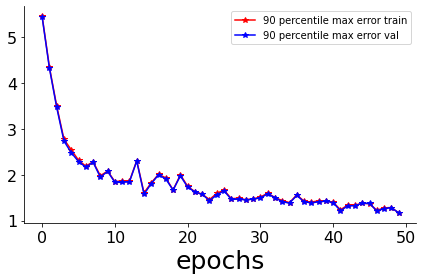

In [125]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['90_percentile_max_error_train'],'r*-', label = '90 percentile max error train')
ax.plot(best_model_hist['90_percentile_max_error_val'],'b*-',label =  '90 percentile max error val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

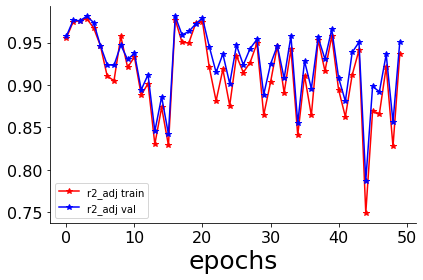

In [126]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

# create overview plot

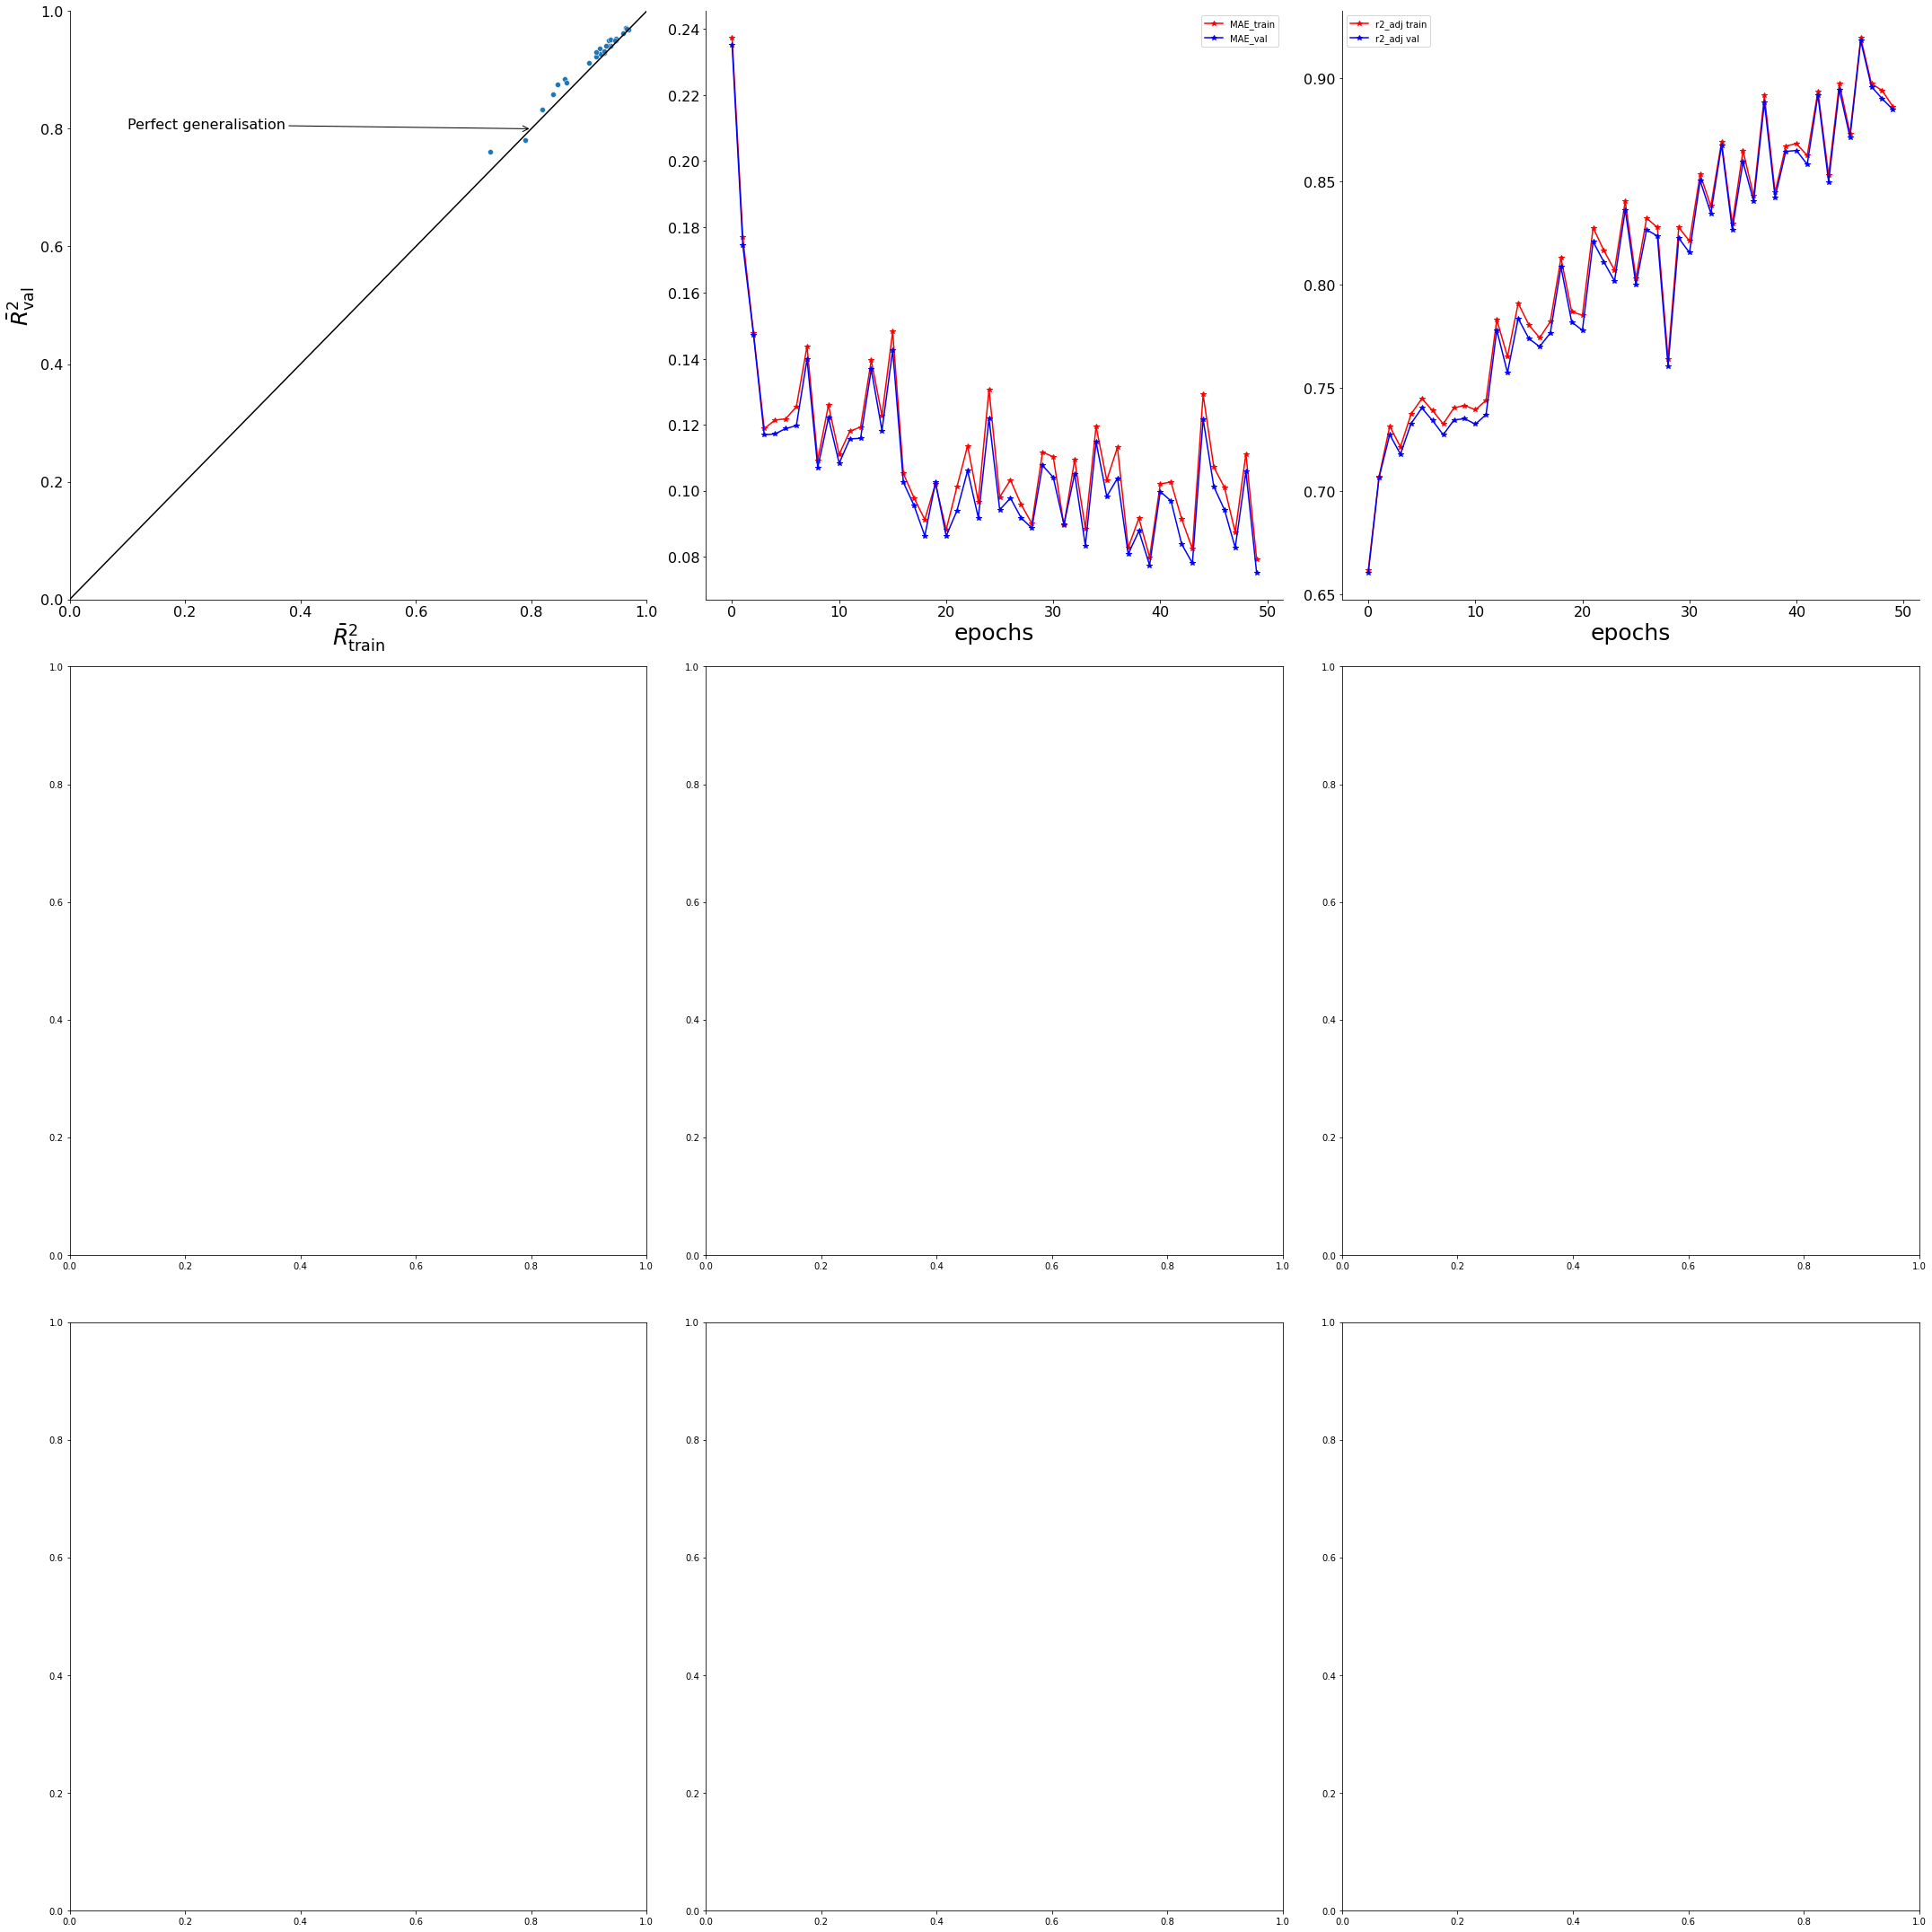

In [127]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train_dvar'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val_dvar'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()




axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

#plot_columns_list = ['batch_size', 'learning_rate', 'n_blocks', 'n_depth','n_width']

#for param in plot_columns_list:
#    if param == 'r2_adj_val':
#        continue
#    ax = axes[axeslist[i][0],axeslist[i][1]]
#    i = i+1
#    sns.boxplot(data=to_plot, x=param, y='r2_val_dvar', color=sns.color_palette()[0],ax=ax)

#    ax.spines['top'].set_visible(False)
#    ax.spines['right'].set_visible(False)
#    ax.set_ylim([0., 1.])
#    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
#    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
#    ax.tick_params(labelsize=14)
#    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')



#ax = axes[2,2]

#sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')

In [128]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/real_meas_scan_532/plots/hyperparameter_scans_new'

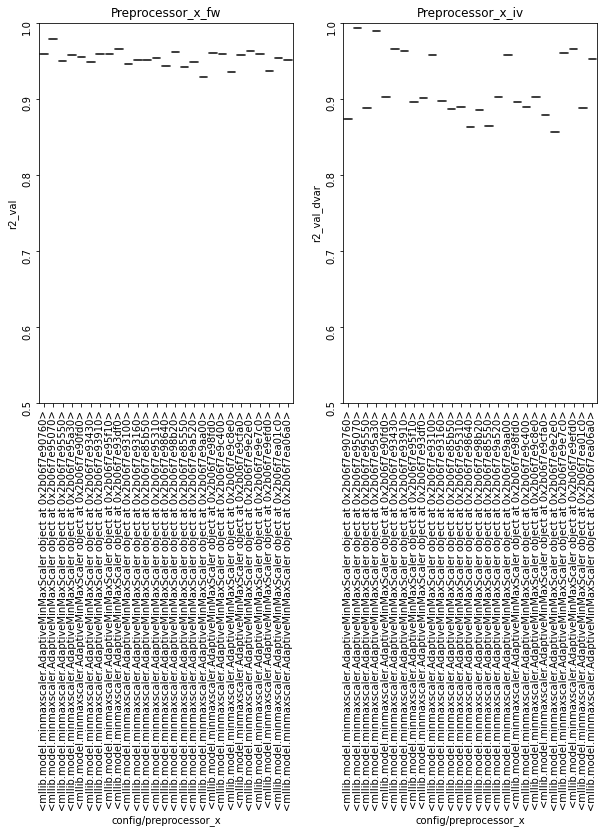

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

ax= axes[0]
sns.boxplot(data=df, x='config/preprocessor_x', y='r2_val', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
#plt.xticks(rotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_x_fw')
ax= axes[1]
sns.boxplot(data=df, x='config/preprocessor_x', y='r2_val_dvar', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_x_iv')
fig.savefig(f'{plot_dir}/hyperparameter_scan_preprocessor_x.jpg',bbox_inches='tight')

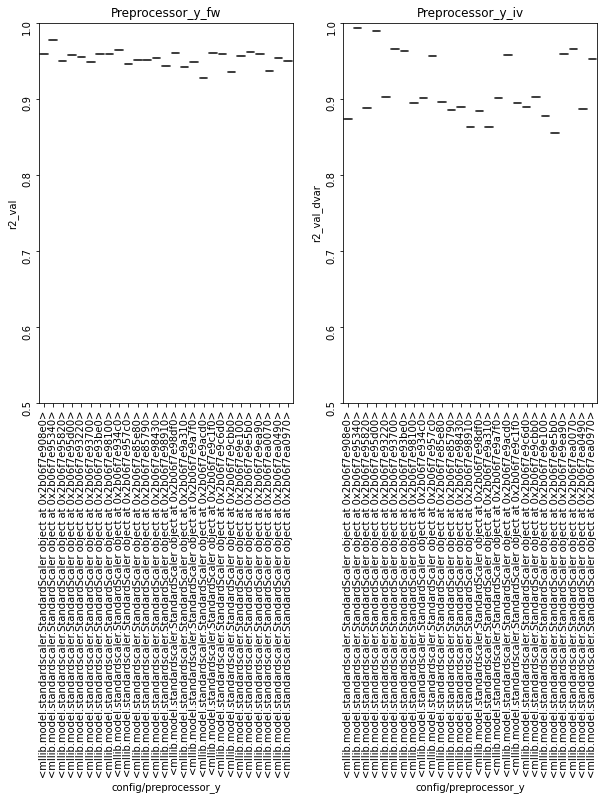

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

ax= axes[0]
sns.boxplot(data=df, x='config/preprocessor_y', y='r2_val', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
#plt.xticks(rotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_y_fw')
ax= axes[1]
sns.boxplot(data=df, x='config/preprocessor_y', y='r2_val_dvar', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_y_iv')
fig.savefig(f'{plot_dir}/hyperparameter_scan_preprocessor_y.jpg',bbox_inches='tight')